## Previsione della concentrazione di gas inquinanti nell'aria

Progetto di Programmazione di Applicazioni Data Intensive a.a. 2023/2024

**Realizzato da**: Federico Di Franco

federico.difranco@studio.unibo.it

## Caricamento librerie
Per prima cosa carichiamo le librerie per effettuare operazioni sui dati:

- **NumPy** per creare e operare su array a N dimensioni
- **pandas** per caricare e manipolare dati tabulari
- **matplotlib** per creare grafici
- **seaborn** per visualizzare dati statistici

Importiamo le librerie usando i loro alias convenzionali e abilitando l'inserimento dei grafici direttamente nel notebook:

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Caricamento dati
Il dataset è stato ricavato dal sito Kaggle che contiene informazioni complete sulla qualità dell'aria e il suo impatto sulla asalute pubblica per 5811 record. Include variabili come l'indice di qualità dell'aria (AQI), le concentrazioni  di vari inquinanti, le condizioni metereologiche di impatto sulla salute. La variabile target è la classe di impatto sulla salute, che classifica l'impatto sulla salute basato sulla qualità dell'aria e altri fattori correlati.

### Sommario
1. **Informazioni sul record**
      - ID del record
      - Metriche di qualità dell'aria
2. **Condizioni meteorologiche**
3. **Metriche di impatto sulla salute**
4. **Variabile target: Classe di impatto sulla salute**

### Informazioni sul record
- **ID del record**
  - RecordID: Un identificatore univoco assegnato a ciascun record (da 1 a 2392).

### Metriche di qualità dell'aria
- **AQI**: Indice di Qualità dell'Aria, una misura di quanto l'aria è attualmente inquinata o di quanto si prevede che diventi inquinata.
- **PM10**: Concentrazione di particolato con diametro inferiore a 10 micrometri (μg/m³).
- **PM2_5**: Concentrazione di particolato con diametro inferiore a 2,5 micrometri (μg/m³).
- **NO2**: Concentrazione di biossido di azoto (ppb).
- **SO2**: Concentrazione di biossido di zolfo (ppb).
- **O3**: Concentrazione di ozono (ppb).

### Condizioni meteorologiche
- **Temperatura**: Temperatura in gradi Celsius (°C).
- **Umidità**: Percentuale di umidità (%).
- **Velocità del Vento**: Velocità del vento in metri al secondo (m/s).

### Metriche di impatto sulla salute
- **Casi Respiratori**: Numero di casi respiratori segnalati.
- **Casi Cardiovascolari**: Numero di casi cardiovascolari segnalati.
- **Ammissioni Ospedaliere**: Numero di ammissioni ospedaliere segnalate.

### Variabile target: Classe di impatto sulla salute
- **Punteggio di Impatto sulla Salute**: Un punteggio che indica l'impatto complessivo sulla salute basato sulla qualità dell'aria e altri fattori correlati, con un intervallo da 0 a 100.
- **Classe di Impatto sulla Salute**: Classificazione dell'impatto sulla salute basata sul punteggio di impatto sulla salute:
  - 0: 'Molto Alto' (Punteggio di Impatto sulla Salute >= 80)
  - 1: 'Alto' (60 <= Punteggio di Impatto sulla Salute < 80)
  - 2: 'Moderato' (40 <= Punteggio di Impatto sulla Salute < 60)
  - 3: 'Basso' (20 <= Punteggio di Impatto sulla Salute < 40)
  - 4: 'Molto Basso' (Punteggio di Impatto sulla Salute < 20)


In [219]:
import os.path
file = "./AirQuality.csv"
if not os.path.exists(file):
    print("Missing dataset, retrieve it from https://archive.ics.uci.edu")

airQuality = pd.read_csv(file)

In [220]:
airQuality.head(3)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0


In [221]:
airQuality.tail(3)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0
5810,5811,83.269257,82.216262,119.968244,193.440691,79.849177,28.681885,18.239090,77.096194,16.410320,14,2,2,81.668298,0.0


## Analisi generale dei dati

Visualizziamo le caratteristiche principali del nostro dataset per capire meglio come la qualità dell'aria influisce sulla salute pubblica. Guardando le statistiche e i pattern dei dati, cerchiamo di individuare connessioni importanti e punti critici che richiedono un'ulteriore esplorazione. Questo ci aiuterà a ottenere una panoramica chiara del contesto e delle tendenze presenti nei dati.

Iniziamo visualizzando la percentuale di tutti i fattori inquinanti presenti all'interno dell'aria.

In [222]:
colors_map = ["#3075EB", "#1A921A", "#FFDD44", "#AA22FF", "#FF0000", "#000000"]

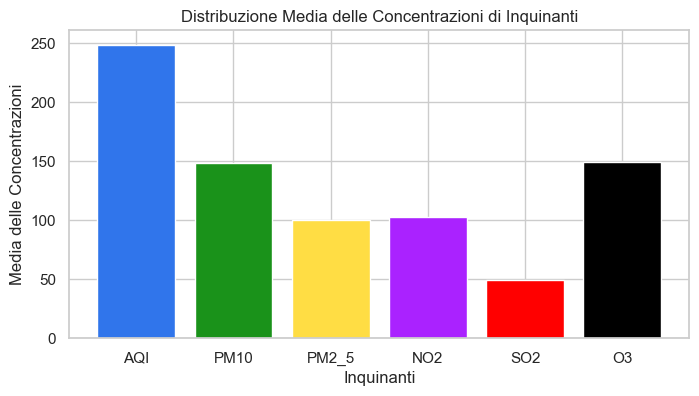

In [223]:
columns_of_interest = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3']
data_of_interest = airQuality[columns_of_interest]
means = data_of_interest.mean()

plt.figure(figsize=(8, 4))
plt.bar(means.index, means, color=colors_map)
plt.xlabel('Inquinanti')
plt.ylabel('Media delle Concentrazioni')
plt.title('Distribuzione Media delle Concentrazioni di Inquinanti')
plt.show()

Dal grafico emerge che diversi inquinanti atmosferici contribuiscono in misura variabile alle concentrazioni medie nell'ambiente studiato. L'impatto significativo che gli inquinanti hanno sulla qualità dell'aria può influenzare direttamente la salute umana, aumentando il rischio di malattie respiratorie e cardiovascolari.

Passiamo allo studio dell'impatto sulla salute basato sulla qualità dell'aria.

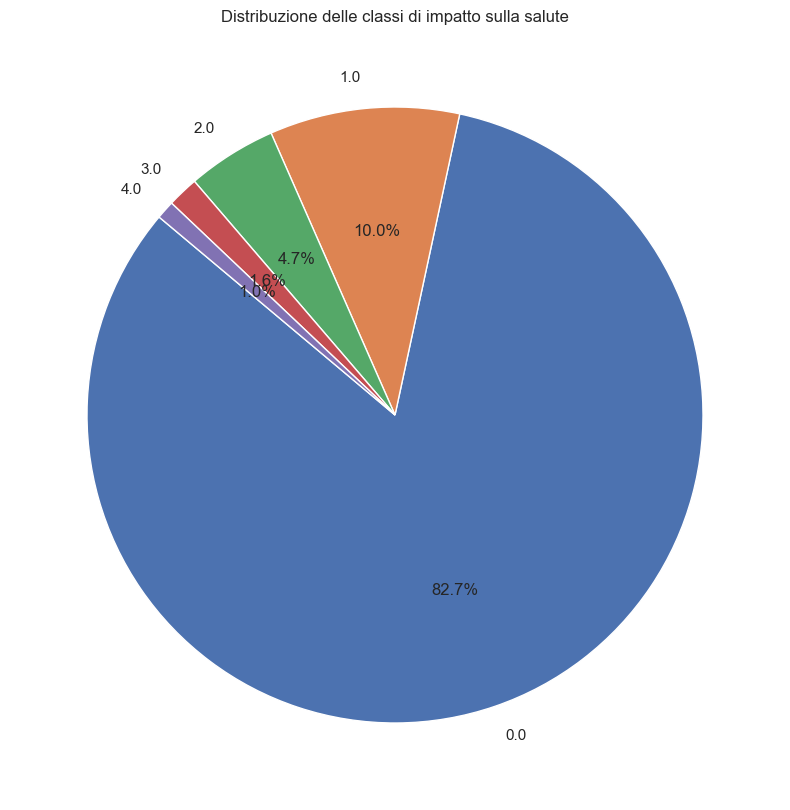

In [224]:
class_counts = airQuality['HealthImpactClass'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle classi di impatto sulla salute')
plt.show()

Come si può notare dal grafico la classe prevalente è la classe "Molto Alto", questo indica che la qualità dell'aria ha un impatto significativo e potenzialmente critico sulla salute delle persone. Tale situazione suggerisce che livelli elevati di inquinanti atmosferici possono comportare rischi importanti per la salute pubblica, influenzando negativamente la qualità della vita e aumentando l'incidenza di malattie respiratorie e cardiovascolari.

Mettiamo in evidenzia la relazione tra l'indice di qualità dell'aria e la classe di impatto sulla salute per vedere come essa incide sulla salute delle persone:

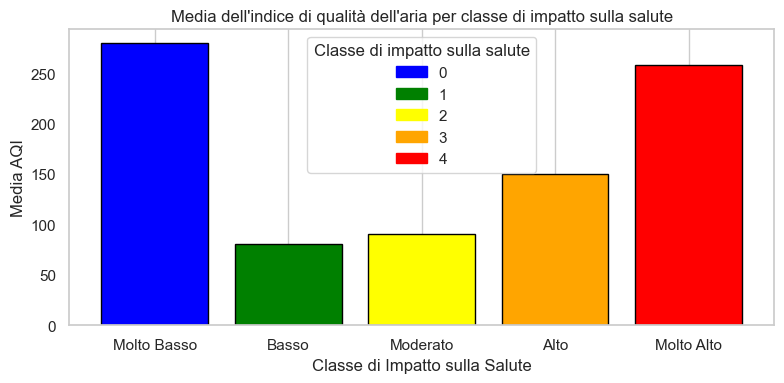

In [225]:
mean_aqi_by_class = airQuality.groupby('HealthImpactClass')['AQI'].mean().reset_index()

health_impact_colors = {
    0: 'blue',
    1: 'green',
    2: 'yellow',
    3: 'orange',
    4: 'red'
}

plt.figure(figsize=(8, 4))
bars = plt.bar(mean_aqi_by_class['HealthImpactClass'], mean_aqi_by_class['AQI'], color=[health_impact_colors[c] for c in mean_aqi_by_class['HealthImpactClass']], edgecolor='black')
plt.title('Media dell\'indice di qualità dell\'aria per classe di impatto sulla salute')
plt.xlabel('Classe di Impatto sulla Salute')
plt.ylabel('Media AQI')
plt.xticks(np.arange(5), ['Molto Basso', 'Basso', 'Moderato', 'Alto', 'Molto Alto'])
plt.grid(axis='y')

legend_handles = []
for key, color in health_impact_colors.items():
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=color, label=key))

plt.legend(handles=legend_handles, title='Classe di impatto sulla salute', loc='best')
plt.tight_layout()
plt.show()


Le classi prevalenti sono la classe Molto basso e la classe Molto Alto: ciò significa che la qualità dell'aria ha un forte impatto con l'assenza di fattori inquinanti, mentre con la presenza di questi ultimi si ha un forte impatto negativo sulla salute delle persone.

# Data cleaning
In questa sezione ci occuperemo di eliminare i dati che non hanno molta influenza nel modello e trovare tutte le possibili dipendenze tra i principali dati.

Si nota che la colonna RecordID contiene informazioni che possono essere eliminate, quindi rimuoveremo la colonna RecordID.

In [226]:
airQuality = airQuality.drop(columns=["RecordID"])

In [227]:
airQuality.head(3)

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0


Mettiamo in evidenzia le possibili correlazioni dei dati per mostrare le eventuali dipendenze, analizziamo prima l'indice di qualità dell'aria con il punteggio di impatto della salute per determinare quali sono i fattori che influenzano di più questa variabile.

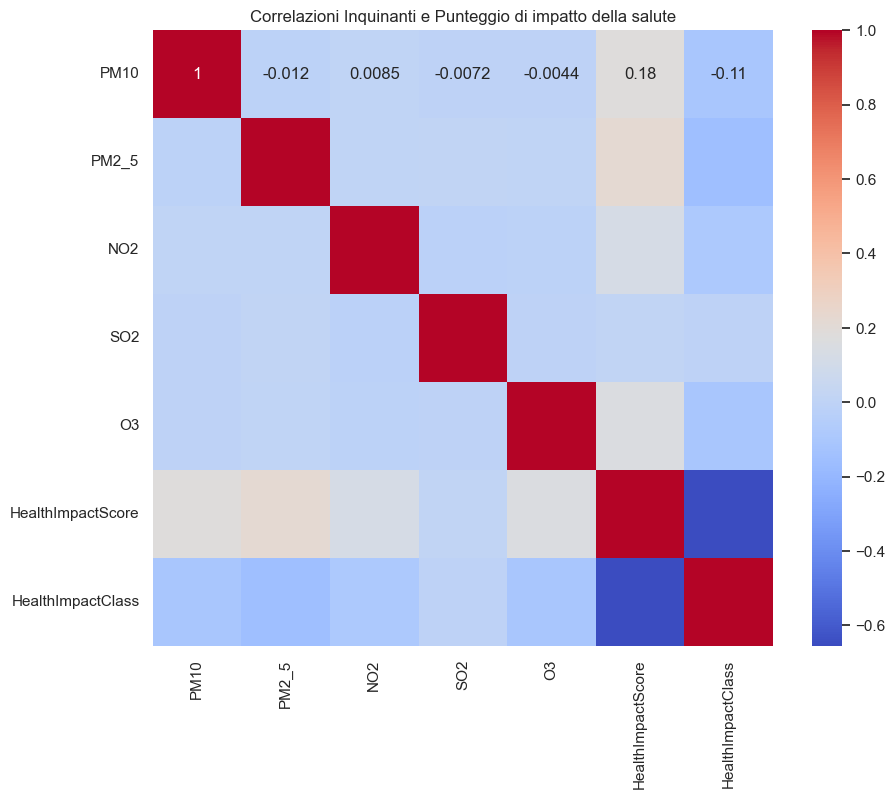

,PM10,PM2_5,NO2,SO2,O3,HealthImpactScore,HealthImpactClass
PM10,1.000000,-0.012193,0.008487,-0.007177,-0.004411,0.182600,-0.108271
PM2_5,-0.012193,1.000000,0.005564,0.015894,0.006070,0.220347,-0.152407
NO2,0.008487,0.005564,1.000000,-0.019979,-0.014910,0.124435,-0.090387
SO2,-0.007177,0.015894,-0.019979,1.000000,-0.004319,0.015535,-0.008364
O3,-0.004411,0.006070,-0.014910,-0.004319,1.000000,0.157940,-0.110093
HealthImpactScore,0.182600,0.220347,0.124435,0.015535,0.157940,1.000000,-0.655611
HealthImpactClass,-0.108271,-0.152407,-0.090387,-0.008364,-0.110093,-0.655611,1.000000


In [228]:
columns_of_interest = ['PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'HealthImpactScore', 'HealthImpactClass']
data_of_interest = airQuality[columns_of_interest]
corMap = data_of_interest.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corMap, annot=True, cmap='coolwarm')
plt.title("Correlazioni Inquinanti e Punteggio di impatto della salute")
plt.show()
corMap

Si nota che i fattori inquinanti che incidono maggiormente sul punteggio dell'impatto sulla salute sono:
- il particolato con diametro inferiore a 10 micrometri (PM10),
- il particolato con diametro inferiore a 2,5 micrometri (PM2_5),
- il biossido di azoto (NO2),
- l'ozono (O3).

A questo punto procediamo a confrontare i fattori meteorologici con i fattori inquinanti e le malattie per trovare delle possibili correlazioni o determinare il loro impatto.

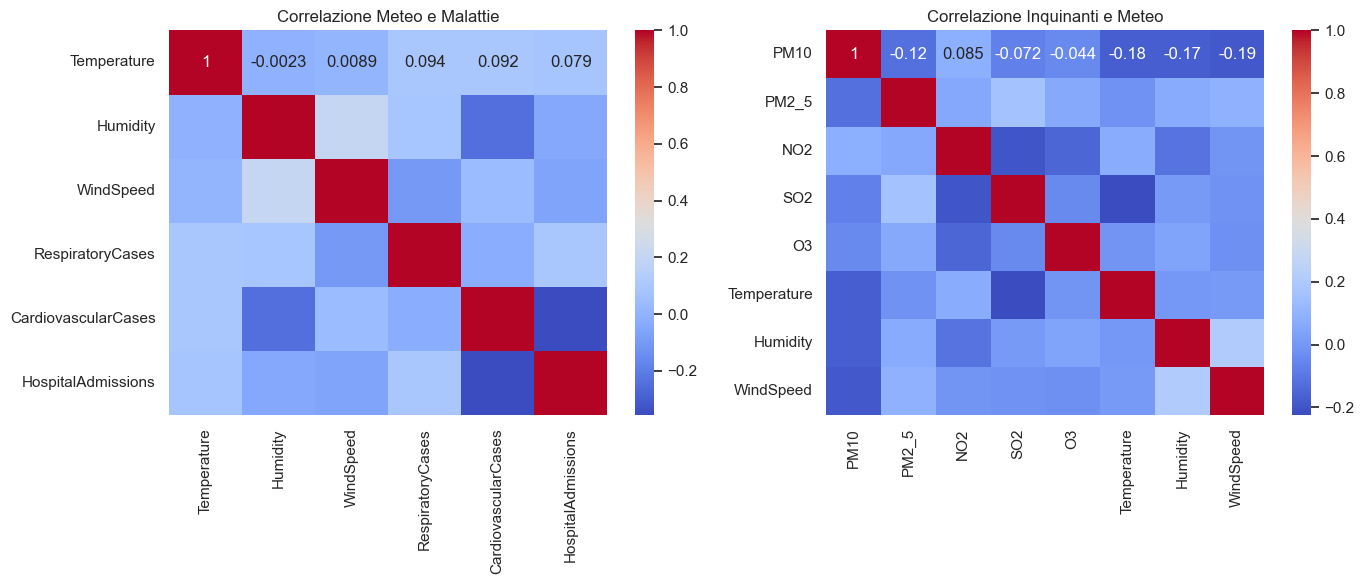

In [229]:
columns_of_interest_1 = ['Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions']
data_of_interest_1 = airQuality[columns_of_interest_1]

corMap_1 = data_of_interest_1.corr()
corMap_1 = corMap_1 * 10
for i in range(len(corMap_1.columns)):
    corMap_1.iloc[i, i] = corMap_1.iloc[i, i] / 10

columns_of_interest_2 = ['PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']
data_of_interest_2 = airQuality[columns_of_interest_2]
corMap_2 = data_of_interest_2.corr()
corMap_2 = corMap_2 * 10

for i in range(len(corMap_2.columns)):
    corMap_2.iloc[i, i] = corMap_2.iloc[i, i] / 10

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sb.heatmap(corMap_1, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title("Correlazione Meteo e Malattie")
sb.heatmap(corMap_2, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title("Correlazione Inquinanti e Meteo")
plt.tight_layout()
plt.show()

In [230]:
# Visualizza la prima corMap
print("Correlazione Meteo e Malattie:")
corMap_1

Correlazione Meteo e Malattie:


,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions
Temperature,1.000000,-0.002328,0.008865,0.093940,0.092486,0.079429
Humidity,-0.002328,1.000000,0.210267,0.086905,-0.246168,-0.048646
WindSpeed,0.008865,0.210267,1.000000,-0.105531,0.037153,-0.064542
RespiratoryCases,0.093940,0.086905,-0.105531,1.000000,-0.026214,0.096792
CardiovascularCases,0.092486,-0.246168,0.037153,-0.026214,1.000000,-0.356316
HospitalAdmissions,0.079429,-0.048646,-0.064542,0.096792,-0.356316,1.000000


In [231]:
# Visualizza la seconda corMap
print("Correlazione Inquinanti e Meteo:")
corMap_2

Correlazione Inquinanti e Meteo:


,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed
PM10,1.000000,-0.121932,0.084866,-0.071769,-0.044106,-0.175608,-0.172898,-0.189592
PM2_5,-0.121932,1.000000,0.055641,0.158943,0.060698,-0.019776,0.067197,0.090410
NO2,0.084866,0.055641,1.000000,-0.199795,-0.149102,0.069708,-0.111003,-0.013976
SO2,-0.071769,0.158943,-0.199795,1.000000,-0.043192,-0.224580,0.009105,-0.016166
O3,-0.044106,0.060698,-0.149102,-0.043192,1.000000,-0.012573,0.039818,-0.025958
Temperature,-0.175608,-0.019776,0.069708,-0.224580,-0.012573,1.000000,-0.002328,0.008865
Humidity,-0.172898,0.067197,-0.111003,0.009105,0.039818,-0.002328,1.000000,0.210267
WindSpeed,-0.189592,0.090410,-0.013976,-0.016166,-0.025958,0.008865,0.210267,1.000000


Gli output e i grafici mostrano che in entrambi i casi i fattori meteorologici non influiscono o non dipendono dai dati principali, per cui possono essere rimossi dal dataset.

In [232]:
airQuality = airQuality.drop(columns=['Temperature', 'Humidity', 'WindSpeed'])
airQuality.head(3)

,AQI,PM10,PM2_5,NO2,SO2,O3,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,13,3,0,100.000000,0.0


 Come ultima correlazione prendiamo in considerazione i fattori inquinanti e le metriche di impatto sulla salute per visualizzare quali elementi incidono maggiormente sulla salute delle persone.

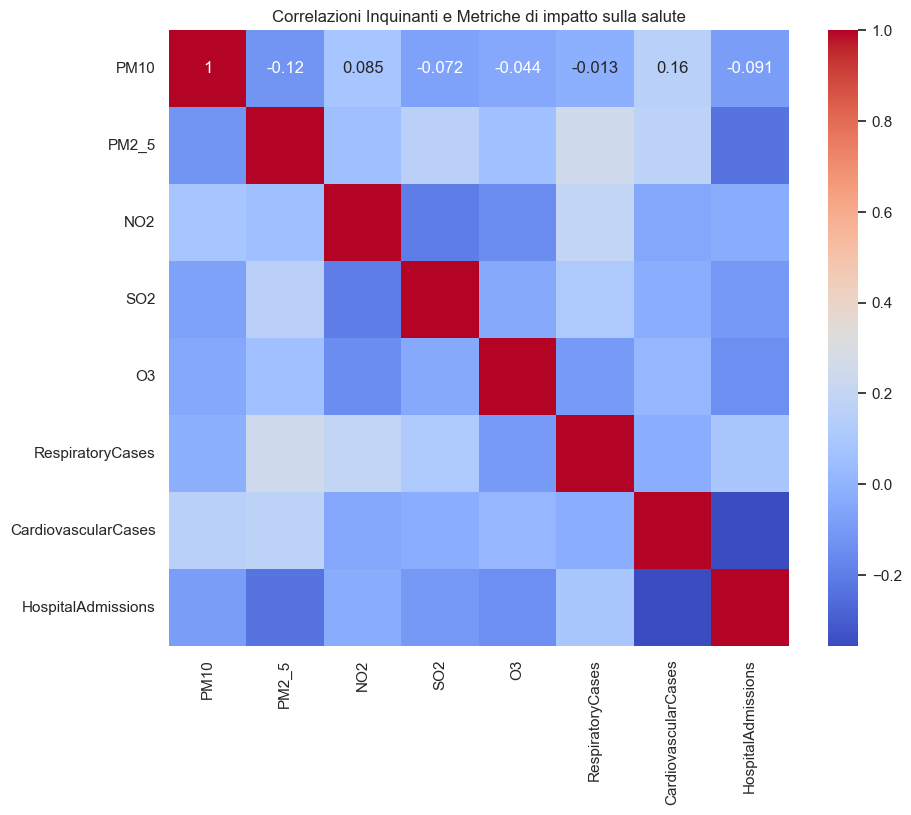

,PM10,PM2_5,NO2,SO2,O3,RespiratoryCases,CardiovascularCases,HospitalAdmissions
PM10,1.000000,-0.121932,0.084866,-0.071769,-0.044106,-0.013149,0.155819,-0.090756
PM2_5,-0.121932,1.000000,0.055641,0.158943,0.060698,0.252438,0.173117,-0.231228
NO2,0.084866,0.055641,1.000000,-0.199795,-0.149102,0.198486,-0.050121,-0.028593
SO2,-0.071769,0.158943,-0.199795,1.000000,-0.043192,0.111300,-0.026721,-0.105462
O3,-0.044106,0.060698,-0.149102,-0.043192,1.000000,-0.100678,0.017526,-0.142926
RespiratoryCases,-0.013149,0.252438,0.198486,0.111300,-0.100678,1.000000,-0.026214,0.096792
CardiovascularCases,0.155819,0.173117,-0.050121,-0.026721,0.017526,-0.026214,1.000000,-0.356316
HospitalAdmissions,-0.090756,-0.231228,-0.028593,-0.105462,-0.142926,0.096792,-0.356316,1.000000


In [233]:
columns_of_interest = ['PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions']
data_of_interest = airQuality[columns_of_interest]

corMap = data_of_interest.corr()
corMap = corMap * 10

for i in range(len(corMap.columns)):
    corMap.iloc[i, i] = corMap.iloc[i, i] / 10

plt.figure(figsize=(10, 8))
sb.heatmap(corMap, annot=True, cmap='coolwarm')
plt.title("Correlazioni Inquinanti e Metriche di impatto sulla salute")
plt.show()
corMap

Le zone più chiare evidenziano le seguenti correlazioni: 
- per le malattie respiratorie gli inquinanti più impattanti sono PM2_5, NO2 e SO2,
- per le malattie cardiovascolari gli inquinanti più impattanti sono PM10, PM2_5,
- per le ammissioni in ospedale non ci sono correlazioni con gli inquinanti.

Dato che le ammissione in ospedale non ha relazioni con i fattori inquinanti si può eliminare dal dataset.

In [234]:
airQuality = airQuality.drop(columns=['HospitalAdmissions'])
airQuality.head(3)

,AQI,PM10,PM2_5,NO2,SO2,O3,RespiratoryCases,CardiovascularCases,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,7,5,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,10,2,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,13,3,100.000000,0.0


# Preparazione del modello
Inizia la fase di preparazione del modello utilizzando i dati aggiornati del dataset che abbiamo raffinato.

Importiamo le librerie necessarie.

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [236]:
# Funzione di preprocessing dei dati
X = airQuality.drop(columns='HealthImpactScore')
y = airQuality['HealthImpactScore']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=92)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(3874, 9) (1937, 9) (3874,) (1937,)


# Regressione Lasso
Con questa funzione è possibile identificare ed eliminare le variabili meno informative, contribuendo a creare un modello più semplice e interpretabile. Creiamo dunque un modello di regressione Lasso utilizzando una pipeline che include la standardizzazione dei dati e il modello di regressione Lasso stesso.

In [237]:
from sklearn.linear_model import Lasso

lasso_model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('lasso_reg', Lasso())
])

param_grid_lasso = {
    'lasso_reg__alpha': [0.1, 0.5, 1]
}

grid_search_lasso = GridSearchCV(lasso_model, param_grid=param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train, y_train)
score_lasso = grid_search_lasso.score(X_val, y_val)
print('Regressione Lasso: {:.5f}'.format(score_lasso))

Regressione Lasso: 0.66459


# Regressione lineare
Questo modello ci permette di modellare la relazione tra una variabile dipendente (target) e una o più variabili indipendenti (features). Troviamo quindi una linea che si adatta ai dati osservati minimizzando l'errore tra i valori predetti e quelli oseervati.

In [238]:
from sklearn.linear_model import LinearRegression

linear_model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('linear_reg', LinearRegression())
])

param_grid_linear = {
    'linear_reg__fit_intercept': [True, False]
}

grid_search_linear = GridSearchCV(linear_model, param_grid=param_grid_linear, cv=5)
grid_search_linear.fit(X_train, y_train)
score_linear = grid_search_linear.score(X_val, y_val)
print('Regressione Lineare: {:.5}'.format(score_linear))

Regressione Lineare: 0.66464


# Regressione Ridge
La regressione Ridge è un tipo di regressione lineare che utilizza una tecnica di regressione lineare con lo scopo di ridurre il rischio di overfitting e migliorare la capacità di generalizzazione del modello. A differenza della regressione lineare semplice, che minimizza solo la somma dei quadrati degli errori tra i valori predetti e quelli osservati, la regressione di Ridge aggiunge un termine di regolarizzazione che penalizza i coefficienti dei modelli più grandi.

In [239]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('ridge_reg', Ridge())
])

param_grid_ridge = {
    'ridge_reg__alpha': [0.1, 0.5, 1]
}
grid_search_ridge = GridSearchCV(ridge_model, param_grid=param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)
score_ridge = grid_search_ridge.score(X_val, y_val)
print('Regression Ridge: {:.5f}'.format(score_ridge))
# print(grid_search_ridge.best_params_)


Regression Ridge: 0.66464


# Decision Tree Regression
Utilizziamo il modello dell'albero decisionale che ci permette di evitare il problema dell'overfitting in quanto sono presenti molte feature nel dataset.

In [240]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('decision_tree', DecisionTreeRegressor(random_state=42))
])

param_grid_decision_tree = {
    'decision_tree__max_depth': [None] + [i for i in range(2,7)],
    'decision_tree__min_samples_split': range(2, 4, 1),
    'decision_tree__min_samples_leaf': range(1, 4, 1)
}

grid_search_decision_tree = GridSearchCV(decision_tree_model, param_grid=param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)
score_decision_tree = grid_search_decision_tree.score(X_val, y_val)
print('Regressione Decision Tree: {:.5f}'.format(score_decision_tree))
# print(grid_search_decision_tree.best_params_)


Regressione Decision Tree: 0.88637


# Random Forest Regression
Questo tipo di regressione permette di migliorare la precisione predittiva attraverso l'utilizzo di un insieme di alberi decisionali, ciascuno dei quali offre una predizione indipendente e aggregata per ottenere una previsione finale più stabile e affidabile.

In [241]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('random_forest', RandomForestRegressor(n_jobs=-1, random_state=42))
])

param_grid_random_forest = {
    # 'random_forest__n_estimators': [50, 100, 250],
    # 'random_forest__max_depth': [None] + [i for i in range(1, 3)],
    # 'random_forest__min_samples_split': range(2, 5),
    # 'random_forest__min_samples_leaf': [1, 2, 4]
}

grid_search_random_forest = GridSearchCV(random_forest_model, param_grid=param_grid_random_forest, cv=5)
grid_search_random_forest.fit(X_train, y_train)
score_random_forest = grid_search_random_forest.score(X_val, y_val)
print('Regressione Random Forest: {:.5f}'.format(score_random_forest))
# print(grid_search_random_forest.best_params_)

Regressione Random Forest: 0.93728


Dopo diverse modifiche e ottimizzazioni dei parametri, si nota che il modello ottiene prestazioni migliori e tempi di esecuzione ridotti quando viene utilizzato con i parametri predefiniti.

# Regressione Gradient Boosting
L'ultimo modello che consideriamo è utilizzato per costruire modelli predittivi precisi. Si basa sul costruire un modello di regressione in modo incrementale, addestrando diversi alberi decisionali in modo sequenziale, ognuno dei quali cerca di correggere gli errori dei modelli precedenti. 

In [242]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
])

param_grid_gradient_boosting = {
    'gradient_boosting__learning_rate': [0.01, 0.1],
    'gradient_boosting__n_estimators': [350],
    # 'gradient_boosting__max_depth': [1, 2, 3]
}

grid_search_gradient_boosting = GridSearchCV(gradient_boosting_model, param_grid=param_grid_gradient_boosting, cv=5)
grid_search_gradient_boosting.fit(X_train, y_train)
score_gradient_boosting = grid_search_gradient_boosting.score(X_val, y_val)
print('Regressione Gradient Boosting: {:.5f}'.format(score_gradient_boosting))
# print(grid_search_gradient_boosting.best_params_)

Regressione Gradient Boosting: 0.96699


Valutiamo gli errori nei vari modelli:

In [243]:
from sklearn.metrics import mean_squared_error

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def print_eval(X, y, model, model_name):
    print(f"Valutazione del modello: {model_name}")
    print("   Mean squared error: {:.5f}".format(mean_squared_error(model.predict(X),  y)))
    print("       Relative error: {:.5%}".format(relative_error(model.predict(X), y)))
    print("R-squared coefficient: {:.5f}".format(model.score(X, y)))
    print("\n")

print_eval(X_val, y_val, grid_search_lasso, "Lasso")
print_eval(X_val, y_val, grid_search_linear, "Lineare")
print_eval(X_val, y_val, grid_search_ridge, "Ridge")
print_eval(X_val, y_val, grid_search_decision_tree, "Decision Tree")
print_eval(X_val, y_val, grid_search_random_forest.best_estimator_, "Random Forest")
print_eval(X_val, y_val, grid_search_gradient_boosting.best_estimator_, "Gradient Boosting")

Valutazione del modello: Lasso
   Mean squared error: 57.61674
       Relative error: 6.56192%
R-squared coefficient: 0.66459


Valutazione del modello: Lineare
   Mean squared error: 57.60864
       Relative error: 6.58417%
R-squared coefficient: 0.66464


Valutazione del modello: Ridge
   Mean squared error: 57.60933
       Relative error: 6.58406%
R-squared coefficient: 0.66464


Valutazione del modello: Decision Tree
   Mean squared error: 19.52028
       Relative error: 2.35495%
R-squared coefficient: 0.88637


Valutazione del modello: Random Forest
   Mean squared error: 10.77354
       Relative error: 1.86943%
R-squared coefficient: 0.93728


Valutazione del modello: Gradient Boosting
   Mean squared error: 5.67095
       Relative error: 1.56334%
R-squared coefficient: 0.96699




 A partire dai risultati ottenuti, le seguenti conclusioni possono essere derivate:
 
- **Modelli di Regressione Lineare**: questa categoria di modelli ha dimostrato un livello di accuratezza uguale per tutti i suoi tre tipi principali (Regressione Lineare, Ridge e Lasso), ma non altrettanto elevata rispetto agli altri. Essendo modello semplici e veloci non sono adatti a individuazione delle relazioni complesse nel dato. 

- **Decision Tree**: presenta un errore molto più basso e maggiore accuratezza in termini di prestazioni rispetto ai modelli lineari.

- **Random Forest**: ulteriore incrementato nelle prestazioni presentando un'alta accuratezza. Ovviamente per via della natura del modello richiede più tempo per l’addestramento rispetto al Decision Tree. 

- **Gradient Boosting**: questo modello ha fornito le migliori prestazioni e ha dimostrato un’elevatissima precisione e minimo errore. Anche se la durata di addestramento risulta essere più lunga rispetto agli altri modelli, offre un'ottima accuratezza e robustezza.
    
In sintesi i modelli più semplici sono più veloci, mentre Random Forest and Gradient Boosting che sono invece tra i modelli più sofisticati presentano migliori performance in termini di accuratezza, quindi sono più indicati a problemi caratterizzati da relazioni complesse nei dati.

# Conclusioni
Dai risultati dei modelli analizzati, possiamo trarre le seguenti conclusioni:

1. **Modelli di Regressione Lineare, Ridge e Lasso** :
    - **Accuracy**: 66%.
    - **Velocità**: 0.06 secondi.

2. **Decision Tree** :
    - **Accuracy**: 89%.
    - **Velocità**: 1.6 secondi.

3. **Random Forest** :
    - **Accuracy**: 94%.
    - **Velocità**: 3 secondi.

4. **Gradient Boosting** :
    - **Accuracy**: 97%.
    - **Velocità**: 28.5 secondi.

- **Miglior modello in base all'accuratezza**: Gradient Boosting.
- **Migliori modelli in base alla velocità**: Regressione Lineare, Ridge e Lasso.
- **Miglior modello in base al rapporto accuratezza/tempo**: Decision Tree.

Questi risultati suggeriscono che, se l'accuratezza è la priorità assoluta, il Gradient Boosting è la scelta migliore. Tuttavia, se si cerca un buon compromesso tra accuratezza e tempo di calcolo, il Decision Tree rappresenta una scelta eccellente. Per applicazioni dove la velocità è critica, i modelli di Regressione Lineare, Ridge e Lasso sono ideali.